In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cust = pd.read_csv("Customers.csv")
prod = pd.read_csv("Products.csv")
tran = pd.read_csv("Transactions.csv")

In [5]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
tran.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#
---
# Checking Nulls

In [9]:
cust.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [10]:
prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
tran.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [14]:
print(f"Cutomers Shape : {cust.shape} \nProducts Shape : {prod.shape} \nTransaction Shape : {tran.shape}")

Cutomers Shape : (200, 4) 
Products Shape : (100, 4) 
Transaction Shape : (1000, 7)


## `No NULLs, We are good to go`

#
---
# Checking the datatypes correctness

In [16]:
cust.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [18]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])

In [19]:
cust.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [20]:
prod.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [21]:
tran.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [22]:
tran['TransactionDate'] = pd.to_datetime(tran['TransactionDate'])

In [23]:
tran.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

## `The Date features in the Customers and Transaction tables are of objects, I reassigned to datetime`

#
---
# Merging the three tables into single

In [39]:
df = pd.merge(left=tran, right=cust, on="CustomerID", how="left")

In [40]:
df = pd.merge(left=df, right=prod, on=["ProductID", "Price"], how="left")

In [41]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [42]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64

#
---
# Univarate & Bi-variante Analysis

# Insight -- **1**

In [47]:
sells = pd.DataFrame(df.groupby(by="ProductName")["TotalValue"].sum()).sort_values(by="TotalValue", ascending=False)

In [55]:
top5_selling = sells.head(5)
bottom5_selling = sells.tail(5)

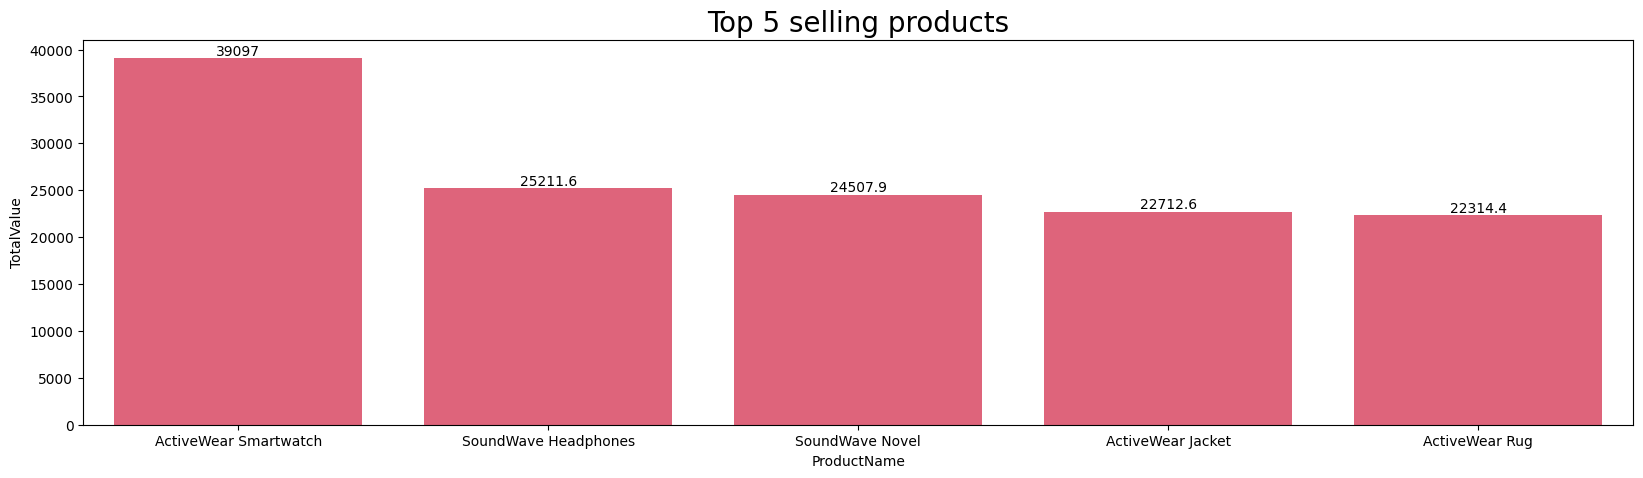

In [70]:
plt.figure(figsize=(20, 5))

a = sns.barplot(x=top5_selling.index, y=top5_selling.TotalValue, color="#F2506E")
a.bar_label(a.containers[0])
plt.title("Top 5 selling products", fontdict={"size" : 20})

plt.show()

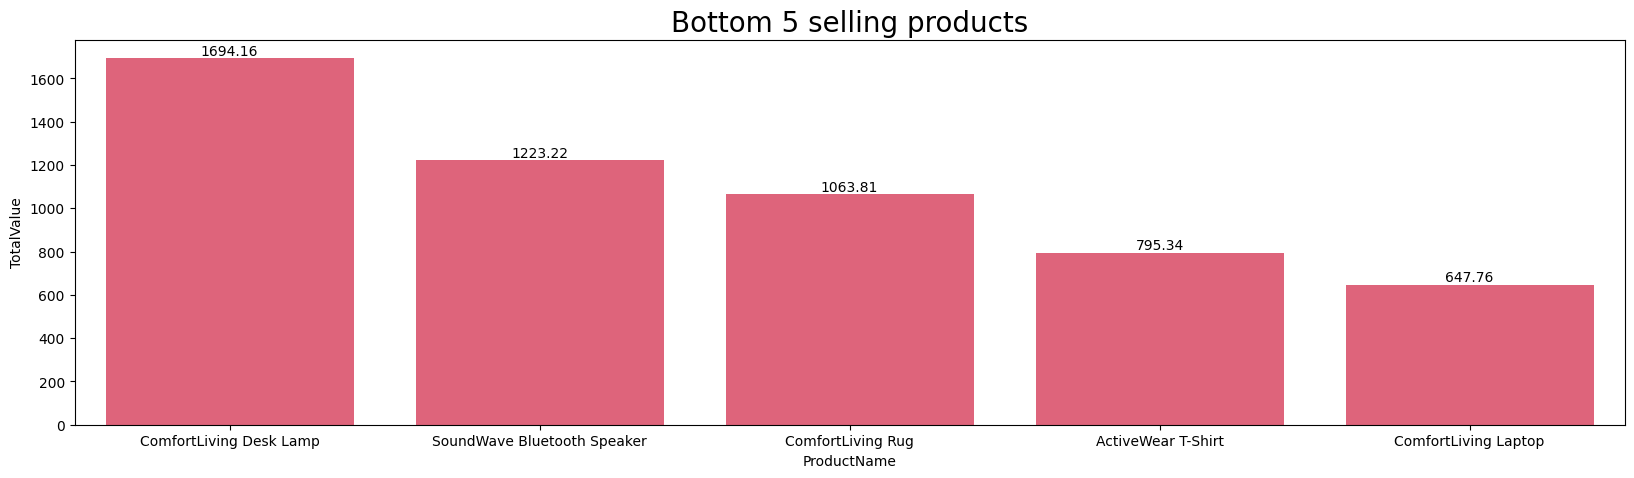

In [72]:
plt.figure(figsize=(20, 5))

a = sns.barplot(x=bottom5_selling.index, y=bottom5_selling.TotalValue, color="#F2506E")
a.bar_label(a.containers[0])
plt.title("Bottom 5 selling products", fontdict={"size" : 20})

plt.show()

### Top 5 product which generate **more** revenue are --> 'ActiveWear Smartwatch', 'SoundWave Headphones', 'SoundWave Novel', 'ActiveWear Jacket', 'ActiveWear Rug'
## `As these are performing better, we need not take any action`
#
### Top 5 product which generate **least** revenue are --> 'ComfortLiving Desk Lamp', 'SoundWave Bluetooth Speaker', 'ComfortLiving Rug', 'ActiveWear T-Shirt', 'ComfortLiving Laptop'
## `As these 5 products are not performing well. We need to either find out what is the reason for not performing well or drop these products from the catalog as they are not bringing much revenue.`

#
---
# Insight -- **2**

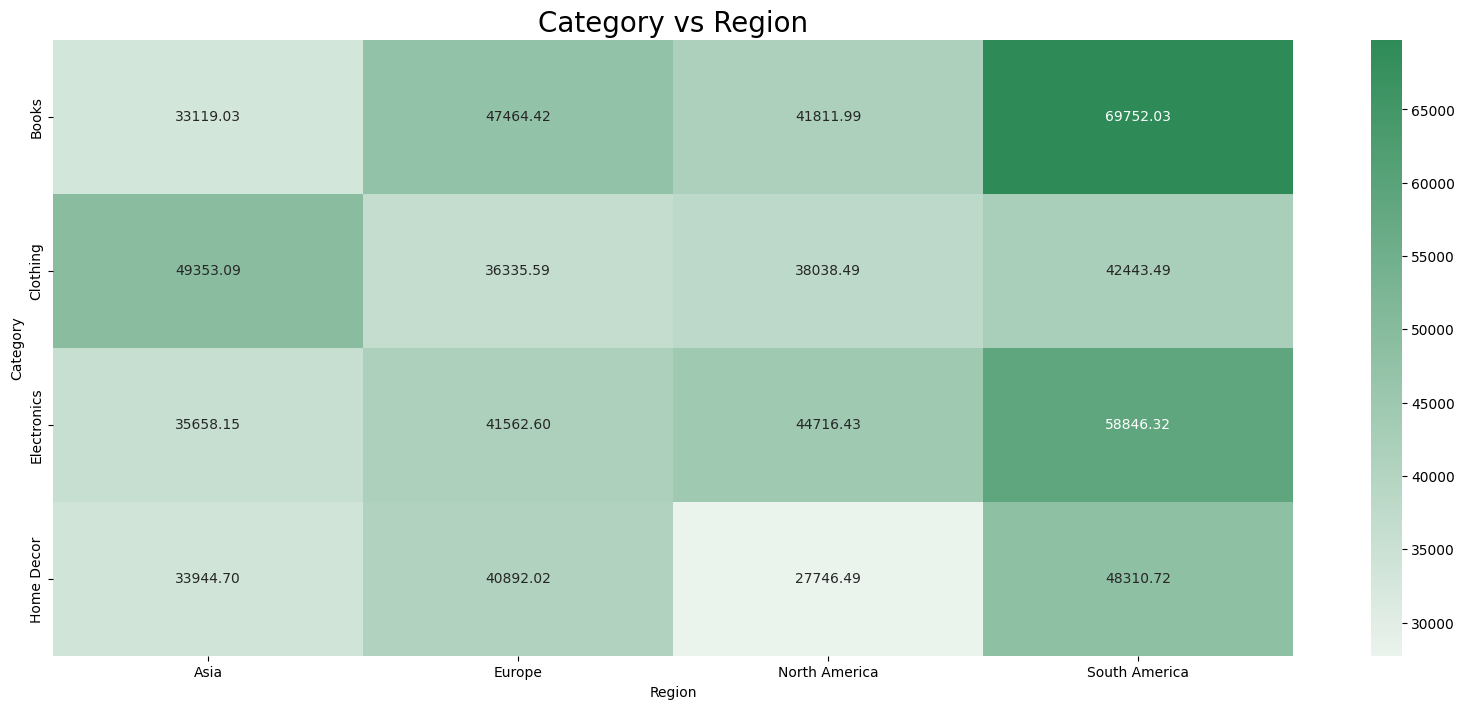

In [126]:
plt.figure(figsize=(20, 8))

pt1 = pd.pivot_table(data=df, index="Category", columns="Region", values="TotalValue", aggfunc="sum")
sns.heatmap(pt1, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, fmt=".2f")
plt.title("Category vs Region", fontdict={"size" : 20})

plt.show()

### In South America --> Books are highest selling
### In North America --> Electronics are highest selling
### In Europe --> Books are highest selling
### In Asia --> Clothing are highest selling

## `As a business owner, we can market these specific categories in their respective regions to maximize our revenue.`

#
---
# Insight -- **3**

In [114]:
df["month_year"] = df['TransactionDate'].dt.strftime('%m/%Y')
df['month_year'] = pd.to_datetime(df['month_year'], format='%m/%Y')

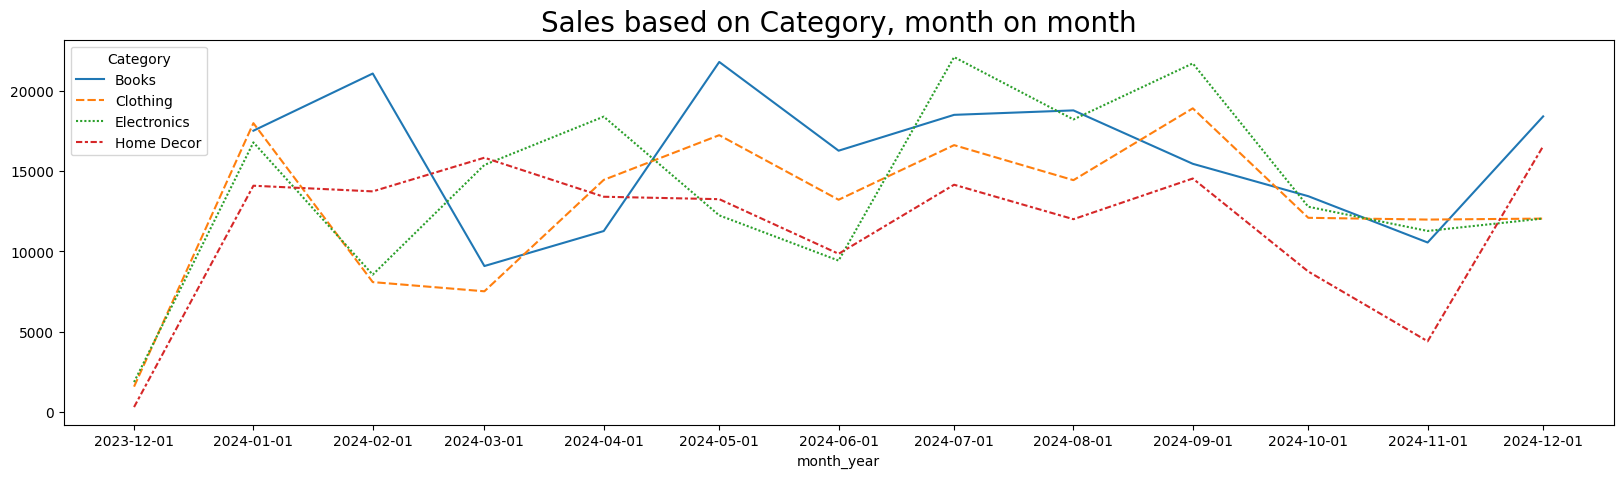

In [134]:
plt.figure(figsize=(20, 5))

pt2 = pd.pivot_table(data=df, index="month_year", columns="Category", values="TotalValue", aggfunc="sum")
sns.lineplot(data=pt2)
plt.xticks(pt2.index)
plt.title("Sales based on Category, month on month", fontdict={"size" : 20})



plt.show()

### Sales of books are high on 02/2024 and 05/2024, We need to stock up books in these months
### Sales of cloths and home decors are constant most of the time in this time period. It is prefered to stock these all the time
### Sales of electronics are high in 07/2024 and 09/2024. It is best to stock up electrong in these months

## `In 12/2023, the sales are very low, may be the company has not recorded the sales transactions or the company is new to the market.`

#
---
# Insight -- **4**

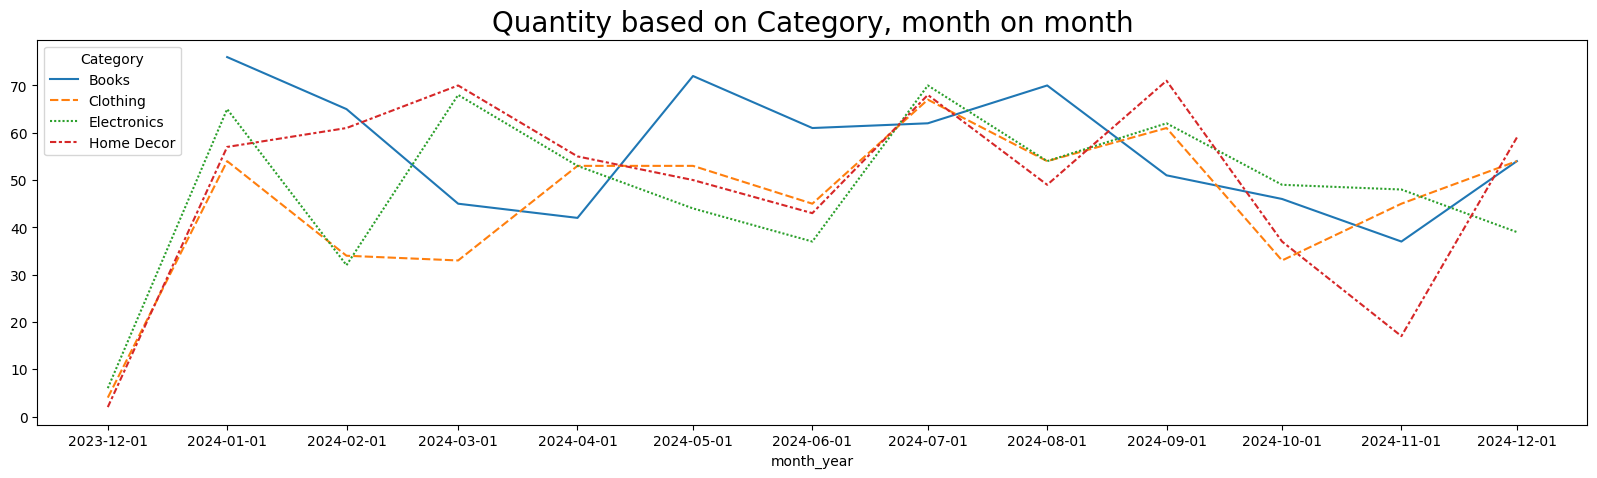

In [132]:
plt.figure(figsize=(20, 5))

pt2 = pd.pivot_table(data=df, index="month_year", columns="Category", values="Quantity", aggfunc="sum")
sns.lineplot(data=pt2)
plt.xticks(pt2.index)
plt.title("Quantity based on Category, month on month", fontdict={"size" : 20})



plt.show()

### Quantity sold of all product are high in **January, July, September, December**. It is better to stock up the catalog in these months, to safe garurd ran out of stock problem.

#
---
# Insight -- **5**

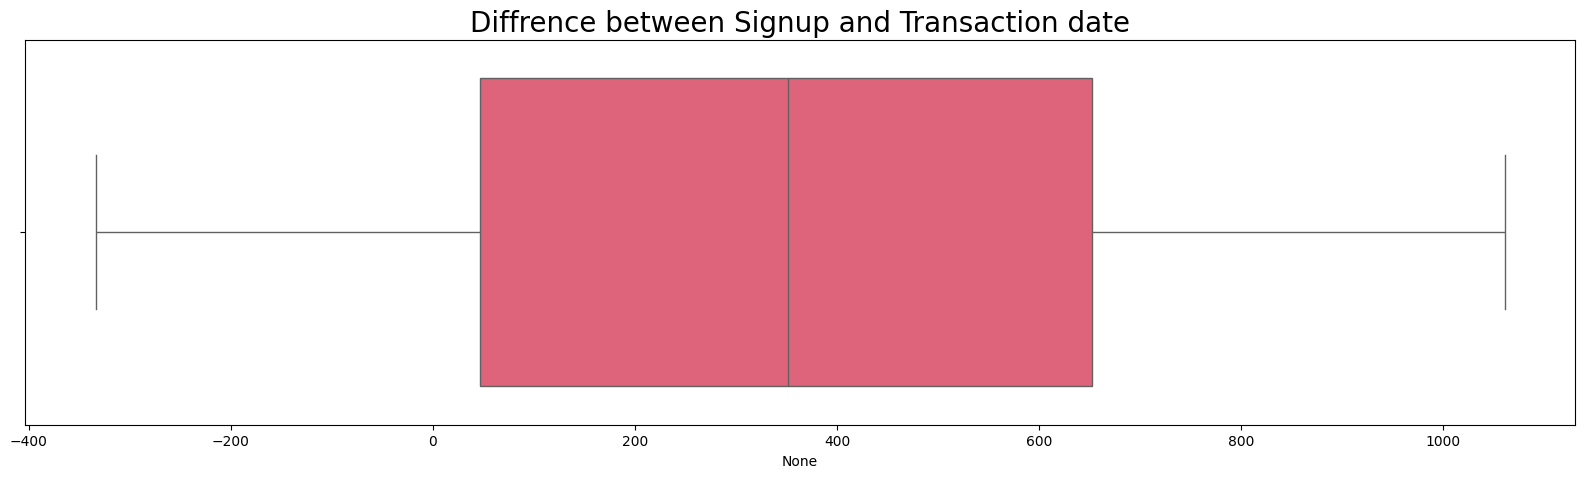

In [161]:
plt.figure(figsize=(20, 5))

sns.boxplot(x=(df["TransactionDate"] - df["SignupDate"]).dt.days, color="#F2506E")
plt.title("Diffrence between Signup and Transaction date", fontdict={"size" : 20})

plt.show()

### There are nearly 20% orders that are made without signup. 
### And 50% order are done 350days after signing up.

## `As a bussines owner we need to make sure that we make customers do transactions as soon they signup. We did bad here`

#
---
# Insight -- **6**

In [182]:
df_min = pd.DataFrame(df.groupby(by="Region")["CustomerID"].nunique())
df_min.rename(columns={"CustomerID" : "Unique Customers"}, inplace=True)

In [183]:
df_min["Transactions Made"] = df.groupby(by="Region")["TransactionID"].nunique().values

In [185]:
df_min["Transaction per Customer"] = df_min["Transactions Made"]/df_min["Unique Customers"]

In [192]:
df_min["Most Ordered Product"] = df.groupby(by="Region")["ProductName"].agg(lambda x: x.value_counts().index[0]).values

In [194]:
df_min["Total Value Generated"] = df.groupby(by="Region")["TotalValue"].sum().values

In [196]:
df_min["Total Value Generated per Customer"] = df_min["Total Value Generated"]/df_min["Unique Customers"]

In [197]:
df_min

,Unique Customers,Transactions Made,Transaction per Customer,Most Ordered Product,Total Value Generated,Total Value Generated per Customer
Region,,,,,,
Asia,44,218,4.954545,HomeSense T-Shirt,152074.97,3456.249318
Europe,50,234,4.680000,SoundWave Headphones,166254.63,3325.092600
North America,46,244,5.304348,SoundWave Headphones,152313.40,3311.160870
South America,59,304,5.152542,ActiveWear Smartwatch,219352.56,3717.840000


### Most of the cusomers are from South America. And highest Revent is generated from there
### There are less customers in Asia but the Mony generated per customer is 2nd. The customers are low but the orders they are making is high value ones. We need to do some marketing stratagy to incread the customers bas in asia.